In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('predictive_maintenance_dirty_dataset.csv')

In [3]:
df.shape

(305, 7)

In [4]:
df.head()

,Timestamp,Machine_ID,Temperature,Vibration,Pressure,Rotation_Speed,Failure
0,2025-08-01 00:33:00,PUMP_003,47.2 C,~2.26,314.738608,1534.211253,0
1,2025-08-01 01:08:00,PUMP_003,57.896064077536955,2.3837173645764542,NaN,NaN,0
2,2025-08-01 02:04:00,pump-001,51.20981135783017,1.043359877671101,292.750822,1485.942812,False
3,2025-08-01 03:02:00,PUMP_004,45.45987962239394,1.2938481493323541,324.656488,1494.355592,0
4,2025-08-01 03:25:00,PUMP_003,49.87772411252967,2.1777756585612162,314.170111,1520.811546,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       305 non-null    object 
 1   Machine_ID      305 non-null    object 
 2   Temperature     276 non-null    object 
 3   Vibration       275 non-null    object 
 4   Pressure        275 non-null    float64
 5   Rotation_Speed  275 non-null    float64
 6   Failure         305 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.8+ KB


In [6]:
df.isnull().sum()

Timestamp          0
Machine_ID         0
Temperature       29
Vibration         30
Pressure          30
Rotation_Speed    30
Failure            0
dtype: int64

In [7]:
df['Machine_ID'].unique()

array(['PUMP_003', 'pump-001', 'PUMP_004', 'Pump_002'], dtype=object)

In [8]:
df.duplicated().value_counts()

False    300
True       5
Name: count, dtype: int64

In [9]:
df['Failure'].unique()

array(['0', 'False', 'Error', 'True', '1'], dtype=object)

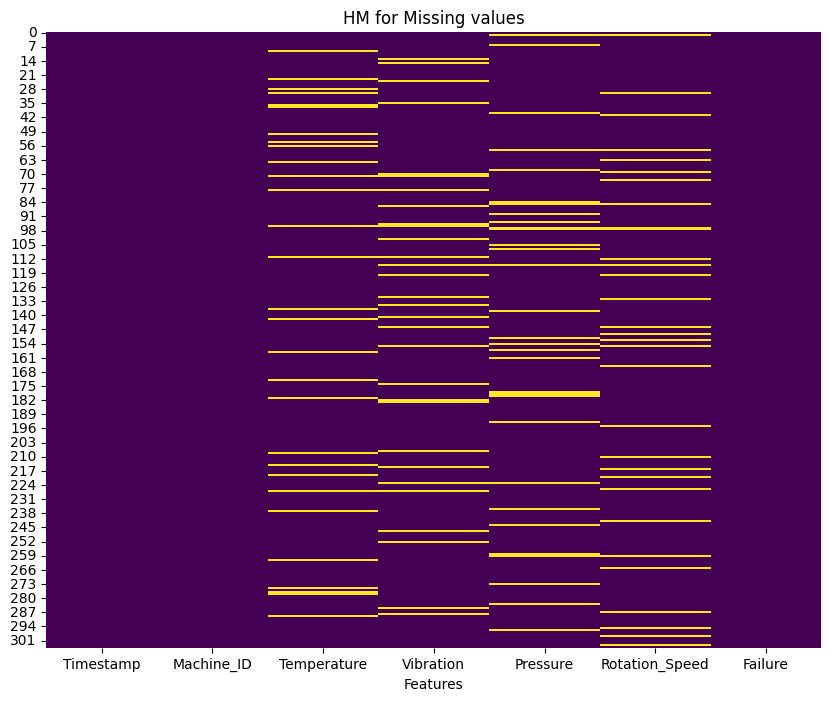

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('HM for Missing values')
plt.xlabel('Features')
plt.show()

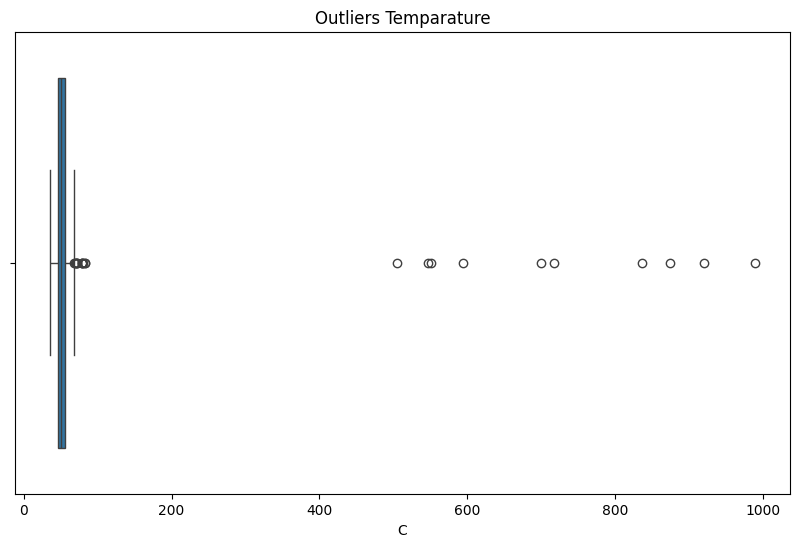

In [29]:
temp_numeric = pd.to_numeric(df['Temperature'].astype(str).str.extract(r'(-?\d+\.?\d*)').iloc[:, 0], errors='coerce') # Tạm thời chuyển đổi trước để visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x=temp_numeric)
plt.title('Outliers Temparature')
plt.xlabel('C')
plt.show()

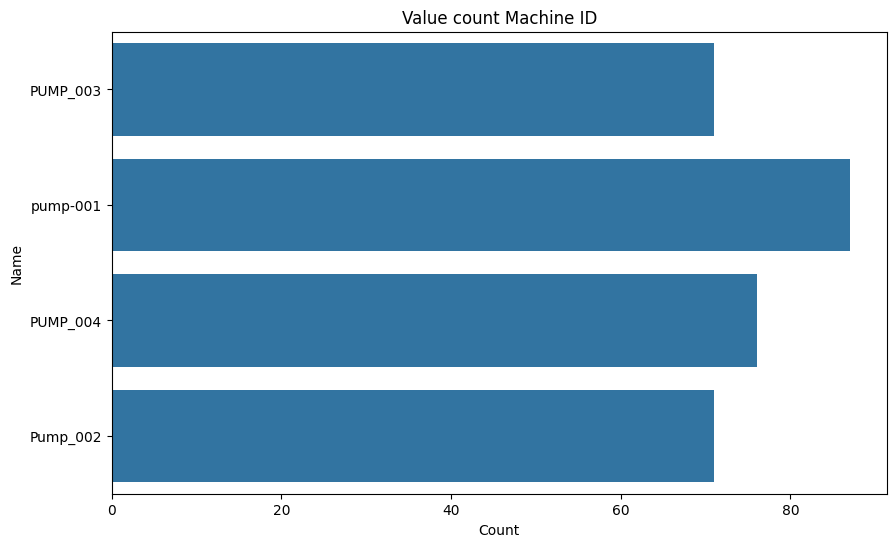

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Machine_ID'])
plt.title('Value count Machine ID')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

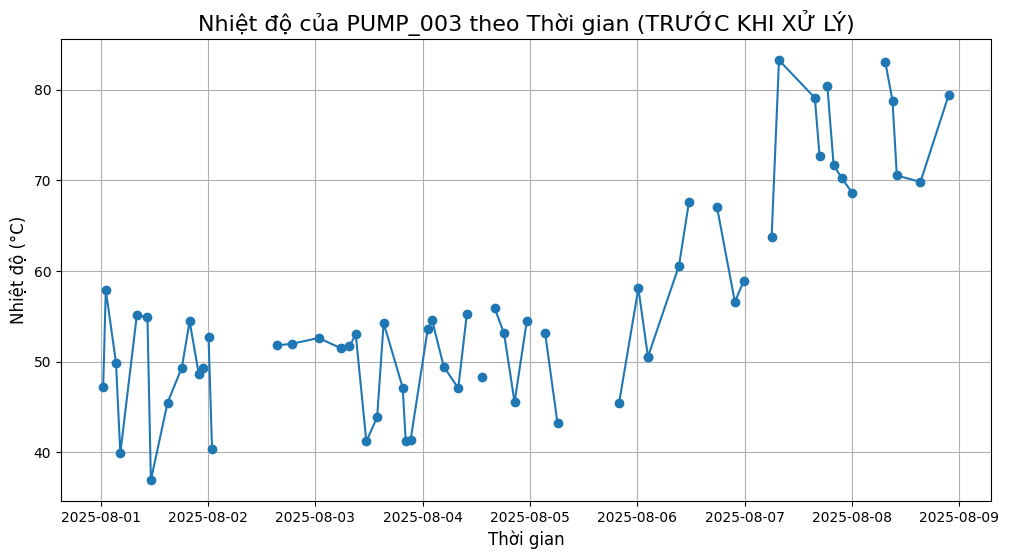

In [59]:
# TẠM THỜI chuyển đổi Timestamp và Temperature để vẽ
df_for_plot = df.copy()
df_for_plot['Timestamp'] = pd.to_datetime(df_for_plot['Timestamp'], errors='coerce')
df_for_plot['Temperature'] = pd.to_numeric(df_for_plot['Temperature'].astype(str).str.extract(r'(-?\d+\.?\d*)').iloc[:, 0], errors='coerce')

# Lọc ra chỉ một máy để biểu đồ được rõ ràng
machine_to_plot = 'PUMP_003'
df_machine_before = df_for_plot[df_for_plot['Machine_ID'].str.upper().str.replace('-', '_') == machine_to_plot].sort_values('Timestamp')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường, thêm marker='o' để thấy rõ các điểm dữ liệu rời rạc
plt.plot(df_machine_before['Timestamp'], df_machine_before['Temperature'], marker='o', linestyle='-')

# Đặt tiêu đề và nhãn
plt.title(f'Nhiệt độ của {machine_to_plot} theo Thời gian (TRƯỚC KHI XỬ LÝ)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True) # Thêm lưới để dễ nhìn

# Hiển thị biểu đồ
plt.show()

## Cleaning

In [39]:
df_pre = df.copy()

In [40]:
len(df_pre)

305

In [41]:
#duplicate
df_pre.drop_duplicates(inplace=True)

In [42]:
len(df_pre)

300

In [43]:
# array(['PUMP_003', 'pump-001', 'PUMP_004', 'Pump_002'], dtype=object)

df_pre['Machine_ID'] = df_pre['Machine_ID'].str.upper().str.replace('-', '_')

In [44]:
df_pre['Machine_ID'].unique()

array(['PUMP_003', 'PUMP_001', 'PUMP_004', 'PUMP_002'], dtype=object)

In [45]:
df_pre['Failure'].unique()

array(['0', 'False', 'Error', 'True', '1'], dtype=object)

In [46]:
failure_mapp = {
    "True": 1, "False": 0,  # Dạng chữ
    True: 1, False: 0,      # Dạng boolean
    1: 1, 0: 0,              # Dạng số 
    "Error": np.nan
}
df_pre['Failure'] = df_pre['Failure'].map(failure_mapp)
df_pre['Failure'].unique()

array([nan,  0.,  1.])

In [47]:
df_pre['Timestamp'] = pd.to_datetime(df_pre['Timestamp'], errors='coerce') #errors='coerce' --> 'NaT' (Not a Time)

# 'Temperature', 'Vibration', 'Pressure', 'Rotation_Speed'
sen_cols = ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']
for col in sen_cols:
    df_pre[col] = df_pre[col].astype(str).str.extract(r'(-?\d+\.?\d*)')
    df_pre[col] = pd.to_numeric(df_pre[col], errors='coerce')

In [48]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       300 non-null    datetime64[ns]
 1   Machine_ID      300 non-null    object        
 2   Temperature     272 non-null    float64       
 3   Vibration       270 non-null    float64       
 4   Pressure        270 non-null    float64       
 5   Rotation_Speed  270 non-null    float64       
 6   Failure         60 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 18.8+ KB


In [49]:
df_pre.loc[df_pre['Temperature'] > 200, 'Temperature'] = np.nan #Nhiet do k the > 200
df_pre.loc[df_pre['Pressure'] < 0, 'Pressure'] = np.nan #Ap suat k the am
df_pre.loc[df_pre['Rotation_Speed'] > 5000, 'Rotation_Speed'] = np.nan

df_pre[sen_cols].describe()

,Temperature,Vibration,Pressure,Rotation_Speed
count,262.000000,270.000000,260.000000,260.000000
mean,51.092217,2.246899,310.597470,1499.262482
std,7.869146,1.094170,11.327990,28.782220
min,35.638689,0.670000,248.065831,1432.366464
25%,46.230233,1.662214,304.855203,1480.542214
50%,50.001369,2.058295,311.036886,1499.170234
75%,54.566366,2.444016,316.978270,1516.619563
max,83.256111,8.051040,336.997141,1639.505815


In [51]:
# interpolation 
df_for_resample = df_pre.copy()

# Từ giờ, tất cả các thao tác sẽ được thực hiện trên df_for_resample
df_for_resample.dropna(subset=['Timestamp'], inplace=True)
df_for_resample = df_for_resample.sort_values(by=['Machine_ID', 'Timestamp'])
df_for_resample.set_index('Timestamp', inplace=True)

# Chuẩn bị để xử lý từng máy một
categorical_cols = ['Machine_ID', 'Failure']
clean_dfs = [] # Một danh sách để lưu các báo cáo đã sạch của từng máy

for machine_id in df_for_resample['Machine_ID'].unique():
    if pd.isna(machine_id): continue
        
    df_machine = df_for_resample[df_for_resample['Machine_ID'] == machine_id].copy()
    
    # Tái cấu trúc và tính trung bình cho các cột số
    df_numeric = df_machine[sen_cols].resample('30T').mean()
    # Dùng nội suy để lấp đầy các khoảng trống một cách mượt mà
    df_numeric.interpolate(method='linear', limit_direction='both', inplace=True)
    
    # Xử lý các cột phân loại theo logic khác
    df_categorical = df_machine[categorical_cols].resample('30T').first()
    df_categorical['Failure'] = df_machine['Failure'].resample('30T').max()
    df_categorical.fillna(method='ffill', inplace=True) # Điền tới cho các cột này
    
    # Ghép hai phần đã xử lý lại với nhau
    df_machine_clean = pd.concat([df_numeric, df_categorical], axis=1)
    
    clean_dfs.append(df_machine_clean)

# Ghép báo cáo của tất cả các máy lại
df_clean = pd.concat(clean_dfs)

# Hoàn thiện những chi tiết cuối cùng
df_clean['Failure'] = df_clean['Failure'].fillna(0).round().astype(int)
df_clean.reset_index(inplace=True) # Đưa Timestamp về lại làm một cột thông thường

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       1468 non-null   datetime64[ns]
 1   Temperature     1468 non-null   float64       
 2   Vibration       1468 non-null   float64       
 3   Pressure        1468 non-null   float64       
 4   Rotation_Speed  1468 non-null   float64       
 5   Machine_ID      1468 non-null   object        
 6   Failure         1468 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 74.7+ KB


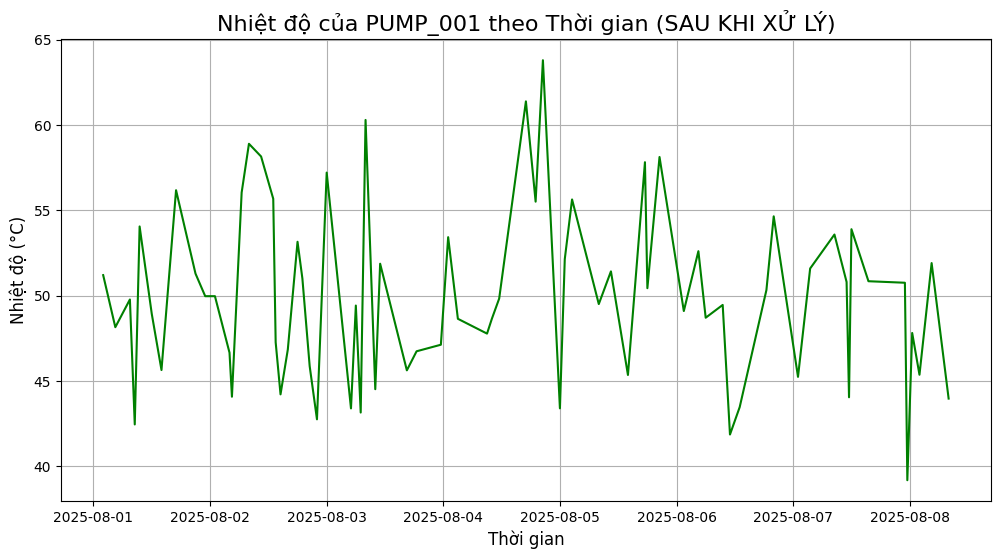

In [57]:
machine_to_plot = 'PUMP_001'
# Bây giờ, vẽ biểu đồ từ DataFrame df_clean
df_machine_after = df_clean[df_clean['Machine_ID'] == machine_to_plot]

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường
plt.plot(df_machine_after['Timestamp'], df_machine_after['Temperature'], color='green')

# Đặt tiêu đề và nhãn
plt.title(f'Nhiệt độ của {machine_to_plot} theo Thời gian (SAU KHI XỬ LÝ)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True)

# Hiển thị biểu đồ
plt.show()